In [2]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import preprocessing, model_selection
import numpy as np 
import pandas as pd 



In [3]:
df = pd.read_csv('beta.csv')
df.head()

,#,title,user_rating,critic_rating,platform
0,0,beat saber,76.0,93,0
1,1,red dead redemption 2,48.0,93,0
2,2,final fantasy xiv: shadowbringers,90.0,91,0
3,3,disco elysium,83.0,91,0
4,4,tetris effect,67.0,90,0


In [4]:
df.tail()

,#,title,user_rating,critic_rating,platform
1182,236,the grand tour game,70.0,52,3
1183,240,generation zero,60.0,50,3
1184,244,power rangers: battle for the grid,60.0,48,3
1185,246,monster jam steel titans,40.0,47,3
1186,248,wwe 2k20,11.0,45,3


In [5]:
df.corr()

,#,user_rating,critic_rating,platform
#,1.000000,-0.365363,-0.893220,-0.085543
user_rating,-0.365363,1.000000,0.451745,0.074972
critic_rating,-0.893220,0.451745,1.000000,0.028682
platform,-0.085543,0.074972,0.028682,1.000000


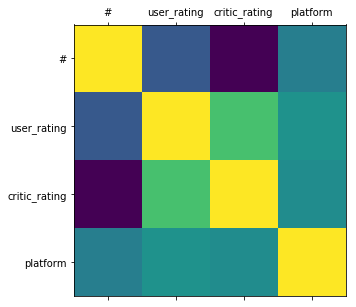

In [6]:
import matplotlib.pyplot as plt

def plot_corr(df):
    corr = df.corr()
    fig,ax = plt.subplots(figsize = (5,5))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    
    
plot_corr(df) 

In [7]:
pc = len(df.loc[df['platform'] == 0])
ps4 = len(df.loc[df['platform'] == 1])
switch = len(df.loc[df['platform'] == 2])
xbox = len(df.loc[df['platform'] == 3])


print("PC = {} ".format(pc))
print("Playstation 4  = {} ".format(ps4))
print("Nintendo Switch = {} ".format(switch))
print("Xbox = {} ".format(xbox))
print("Celkový počet hier v datasete = {} ".format(len(df)))



PC = 327 
Playstation 4  = 310 
Nintendo Switch = 364 
Xbox = 186 
Celkový počet hier v datasete = 1187 


In [8]:
x = np.array(df.drop(['platform', 'title','#'],1))
y = np.array(df['platform'], dtype ='float')   
y.shape = (len(y),1)   


In [9]:
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.5)

In [10]:
x_f_train = preprocessing.scale(x_train)
x_f_test = preprocessing.scale(x_test)
y_f_train = y_train
y_f_test = y_test

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1,activation = tf.nn.sigmoid))


model.compile(optimizer = tf.optimizers.Adagrad(),
       loss = 'binary_crossentropy',
       metrics=['accuracy'])

In [40]:
scores = model.fit(x_f_train, y_f_train, batch_size=100, epochs=10, validation_split=0.2)

Train on 474 samples, validate on 119 samples
Epoch 1/10
474/474 [==============================] - 1s 1ms/sample - loss: 0.6622 - accuracy: 0.2848 - val_loss: 0.6355 - val_accuracy: 0.2941
Epoch 2/10
474/474 [==============================] - 0s 62us/sample - loss: 0.6448 - accuracy: 0.2743 - val_loss: 0.6167 - val_accuracy: 0.2605
Epoch 3/10
474/474 [==============================] - 0s 76us/sample - loss: 0.6292 - accuracy: 0.2806 - val_loss: 0.5991 - val_accuracy: 0.2521
Epoch 4/10
474/474 [==============================] - 0s 96us/sample - loss: 0.6143 - accuracy: 0.2764 - val_loss: 0.5824 - val_accuracy: 0.2521
Epoch 5/10
474/474 [==============================] - 0s 55us/sample - loss: 0.6003 - accuracy: 0.2764 - val_loss: 0.5666 - val_accuracy: 0.2521
Epoch 6/10
474/474 [==============================] - 0s 83us/sample - loss: 0.5870 - accuracy: 0.2764 - val_loss: 0.5515 - val_accuracy: 0.2521
Epoch 7/10
474/474 [==============================] - 0s 109us/sample - loss: 0.5743 

In [42]:
print("Presnosť trénovania: %.2f%% / Validácia trénovania presnosti: %.2f%% / Strata trénovania: %.2f%% / Validácia straty %.2f%% "  %
      (100*scores.history['accuracy'][-1], 100*scores.history['val_accuracy'][-1], 100*scores.history['loss'][-1], 100*scores.history['val_loss'][-1]))

Presnosť trénovania: 27.64% / Validácia trénovania presnosti: 25.21% / Strata trénovania: 53.80% / Validácia straty 49.54% 


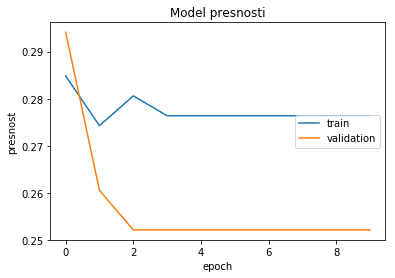

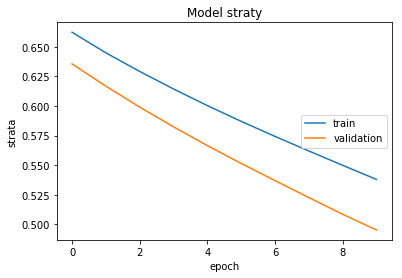

In [43]:
plt.plot(scores.history['accuracy'])
plt.plot(scores.history['val_accuracy'])

plt.title('Model presnosti')
plt.ylabel('presnost')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.show()

plt.plot(scores.history['loss'])
plt.plot(scores.history['val_loss'])

plt.title('Model straty')
plt.ylabel('strata')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='center right')
plt.show()


Počet hier = 1187


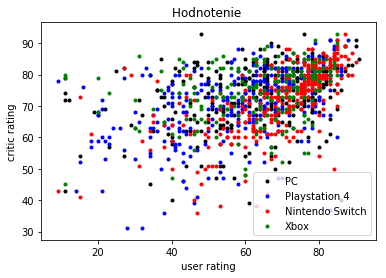

In [16]:
x1 = np.array(df.drop(['title','#'],1))


y1 = np.array(df['platform'], dtype ='float')

y1.shape = (len(y1),1)
c1 =0

for i in range(0,len(x1)):
    print
    if x1[i][2] == 0:
        a = plt.scatter(x1[i][0],x1[i][1], c = 'black', marker = '.')
    elif x1[i][2]== 1:
        b = plt.scatter(x1[i][0],x1[i][1], c = 'blue',marker = '.')
    elif x1[i][2]== 2:
        c = plt.scatter(x1[i][0],x1[i][1], c = 'red',marker = '.')
    elif x1[i][2]== 3:
        d = plt.scatter(x1[i][0],x1[i][1], c = 'green',marker = '.')             
        
    c1+=1


print("Počet hier = {}".format(c1)) 
plt.xlabel("user rating")
plt.ylabel("critic rating")
plt.title("Hodnotenie ")
plt.legend((a,b,c,d),('PC','Playstation 4','Nintendo Switch','Xbox'))

plt.show()
